In [47]:
import os
import json
import cv2
import ultralytics
from google import genai
from google.genai import types
from PIL import Image
from ultralytics.utils.plotting import Annotator, colors

# This check is good practice to keep
ultralytics.checks()

# --- API Key Handling for Local Environment ---
# Get the API key from an environment variable
API_KEY = os.getenv('GOOGLE_API_KEY')

if API_KEY:
    # Initialize the Gemini client with your API key
    client = genai.Client(api_key=API_KEY)
    print("✅ Gemini client initialized successfully.")
else:
    print("🛑 API Key not found. Please set the GOOGLE_API_KEY environment variable and restart the kernel.")

# A simpler, but less secure alternative (uncomment below if you prefer)
# WARNING: Do not share your notebook if you paste your key directly.
# API_KEY = "YOUR_API_KEY_HERE"
# client = genai.Client(api_key=API_KEY)

Ultralytics 8.3.167  Python-3.13.5 torch-2.7.1+cpu CPU (Intel Core(TM) i5-1035G1 1.00GHz)
Setup complete  (8 CPUs, 15.8 GB RAM, 210.9/237.3 GB disk)


✅ Gemini client initialized successfully.


In [57]:
def inference(image, prompt, temp=0.5):
    """Performs inference using the Google Gemini model."""
    if not API_KEY:
        raise ValueError("API Key is not set. Cannot perform inference.")

    response = client.models.generate_content(
        model="gemini-2.5-flash",
        contents=[prompt, image],
        config=types.GenerateContentConfig(
            temperature=temp,
        ),
    )
    return response.text

def read_local_image(image_path):
    """Reads an image from a local file path."""
    # Read image with opencv
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Could not read image from path: {image_path}")

    # Convert from BGR (OpenCV's default) to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract width and height
    h, w = image.shape[:2]

    # Return the image in PIL format, along with its dimensions
    return Image.fromarray(image), w, h

def clean_results(results):
    """Clean the results for visualization."""
    return results.strip().removeprefix("```json").removesuffix("```").strip()

print("✅ Functions defined.")

✅ Functions defined.


✅ Successfully loaded image: 'masaustu.png' with dimensions 1918x1078


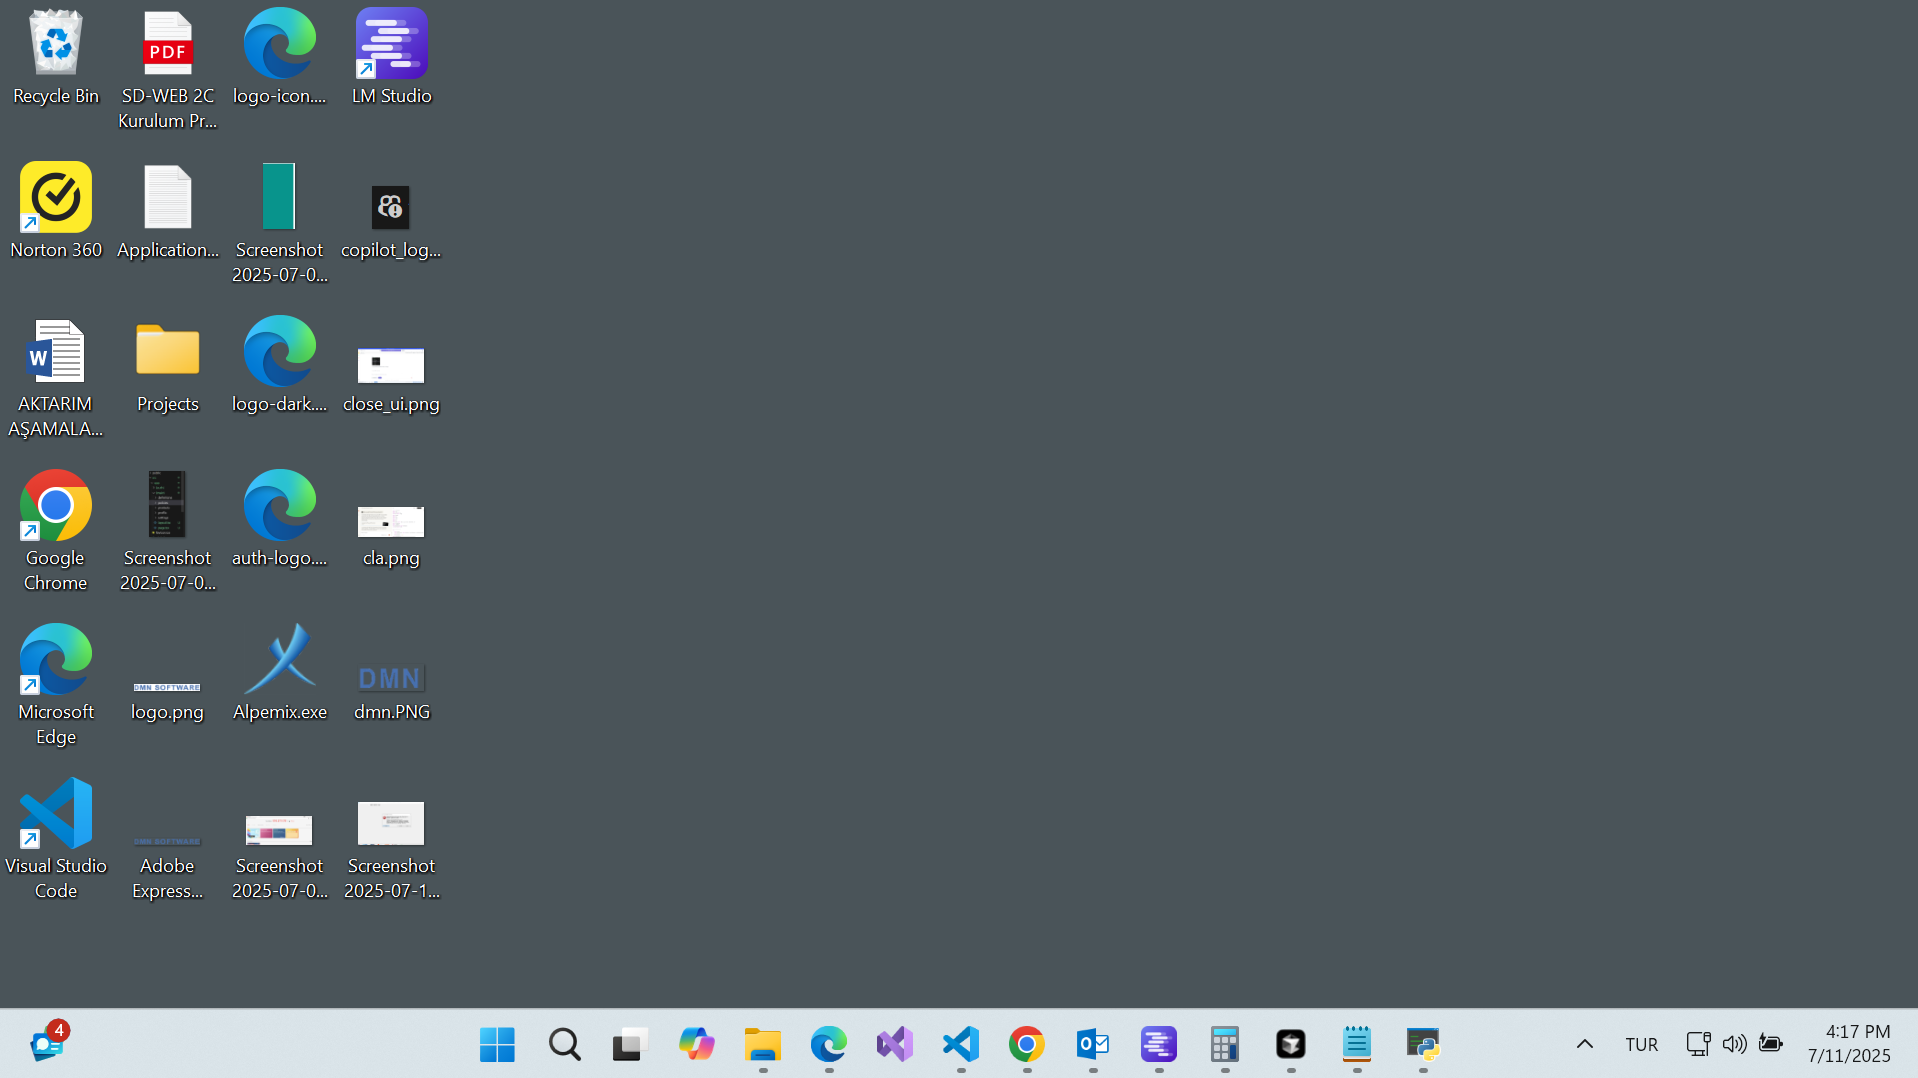

In [58]:
# --- Configuration ---
# ⬇️ IMPORTANT: Make sure this matches the filename of your image.
local_image_path = "masaustu.png"

# --- Define the Prompts (More specific) ---
prompt = """
Detect all 2d bounding boxes of the ui elements in the provided screenshoot of a microsoft windows.
"""
output_prompt = """
return just box_2d and labels, no additional text.
example output: {"box_2d": [435, 87, 727, 281], "label": "window icon"}
"""




# --- Load the Image ---
try:
    image, w, h = read_local_image(local_image_path)
    print(f"✅ Successfully loaded image: '{local_image_path}' with dimensions {w}x{h}")
    # Display the original image
    display(image)
except FileNotFoundError as e:
    print(f"🛑 Error: {e}")

In [59]:
print("🧠 Performing inference with Gemini... (This may take a moment)")
results = inference(image, prompt + output_prompt)

print("\n--- Raw Results from Gemini ---")
print(results)
print("----------------------------")

🧠 Performing inference with Gemini... (This may take a moment)

--- Raw Results from Gemini ---
```json
[
  {"box_2d": [18, 12, 98, 58], "label": "Recycle Bin shortcut"},
  {"box_2d": [18, 60, 118, 106], "label": "SD-WEB 2C Kurulum Pr... shortcut"},
  {"box_2d": [18, 118, 98, 164], "label": "logo-icon... shortcut"},
  {"box_2d": [18, 176, 98, 222], "label": "LM Studio shortcut"},
  {"box_2d": [148, 12, 240, 58], "label": "Norton 360 shortcut"},
  {"box_2d": [148, 60, 240, 106], "label": "Application... shortcut"},
  {"box_2d": [148, 118, 262, 164], "label": "Screenshot 2025-07-0... shortcut"},
  {"box_2d": [148, 176, 240, 222], "label": "copilot_log... shortcut"},
  {"box_2d": [304, 12, 404, 58], "label": "AKTARIM AŞAMALA... shortcut"},
  {"box_2d": [304, 60, 384, 106], "label": "Projects folder"},
  {"box_2d": [304, 118, 384, 164], "label": "logo-dark... shortcut"},
  {"box_2d": [304, 176, 384, 222], "label": "close_ui.png shortcut"},
  {"box_2d": [448, 12, 548, 58], "label": "Google 

In [60]:
cln_results = clean_results(results)
print("--- Cleaned Results ---")
print(cln_results)
print("-----------------------")

try:
    cln_results = json.loads(cln_results)
    print("\n✅ Successfully parsed results as JSON.")
except json.JSONDecodeError as e:
    print(f"\n🛑 JSONDecodeError: {e}")
    print("Could not parse the results. The model may have returned an unexpected format.")

--- Cleaned Results ---
[
  {"box_2d": [18, 12, 98, 58], "label": "Recycle Bin shortcut"},
  {"box_2d": [18, 60, 118, 106], "label": "SD-WEB 2C Kurulum Pr... shortcut"},
  {"box_2d": [18, 118, 98, 164], "label": "logo-icon... shortcut"},
  {"box_2d": [18, 176, 98, 222], "label": "LM Studio shortcut"},
  {"box_2d": [148, 12, 240, 58], "label": "Norton 360 shortcut"},
  {"box_2d": [148, 60, 240, 106], "label": "Application... shortcut"},
  {"box_2d": [148, 118, 262, 164], "label": "Screenshot 2025-07-0... shortcut"},
  {"box_2d": [148, 176, 240, 222], "label": "copilot_log... shortcut"},
  {"box_2d": [304, 12, 404, 58], "label": "AKTARIM AŞAMALA... shortcut"},
  {"box_2d": [304, 60, 384, 106], "label": "Projects folder"},
  {"box_2d": [304, 118, 384, 164], "label": "logo-dark... shortcut"},
  {"box_2d": [304, 176, 384, 222], "label": "close_ui.png shortcut"},
  {"box_2d": [448, 12, 548, 58], "label": "Google Chrome shortcut"},
  {"box_2d": [448, 60, 548, 106], "label": "Screenshot 2025-0

✅ Annotated image saved as 'output_image.jpg'


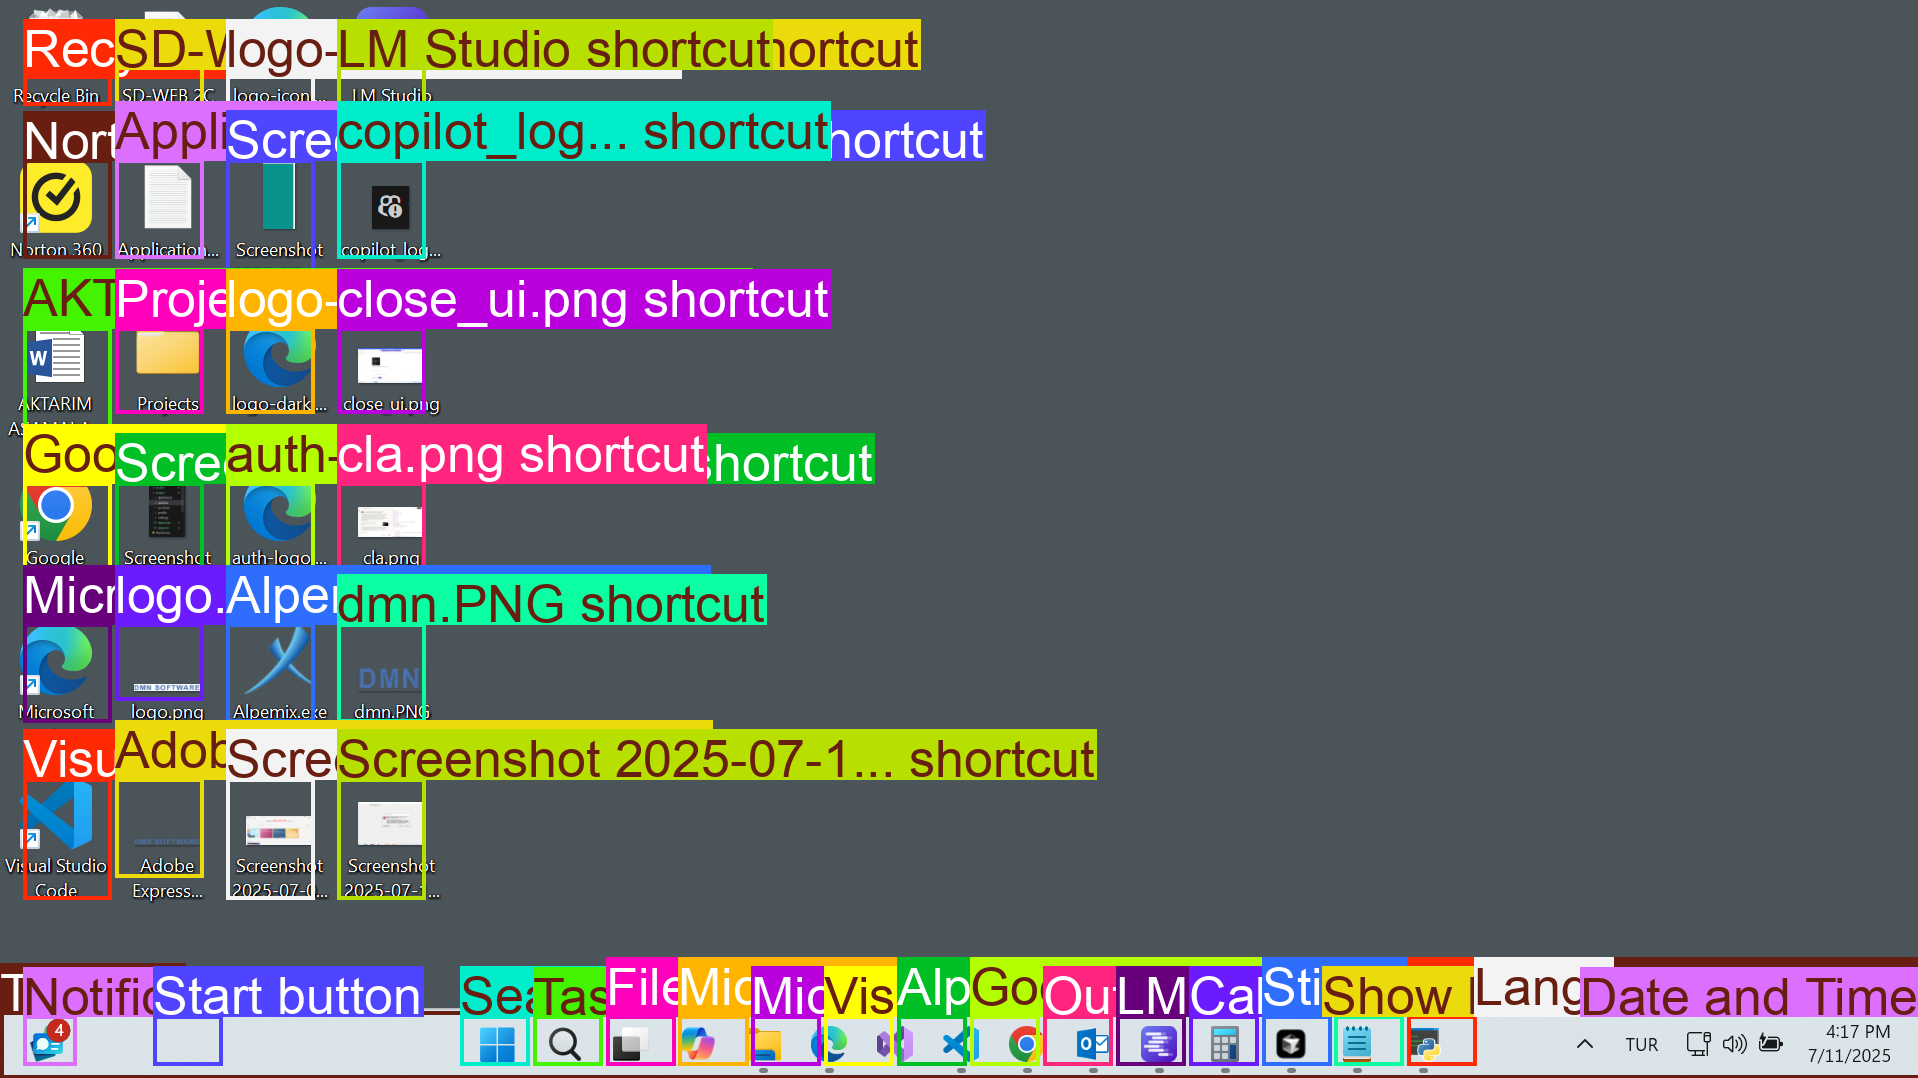

In [61]:
# Initialize Ultralytics annotator with a copy of the original image
annotator = Annotator(image.copy())

# Check if cln_results is a list before iterating
if isinstance(cln_results, list):
    for idx, item in enumerate(cln_results):
        # Scale normalized box coordinates (0–1000) to image dimensions
        y1, x1, y2, x2 = item["box_2d"]
        y1 = y1 / 1000 * h
        x1 = x1 / 1000 * w
        y2 = y2 / 1000 * h
        x2 = x2 / 1000 * w

        if x1 > x2: x1, x2 = x2, x1
        if y1 > y2: y1, y2 = y2, y1

        annotator.box_label([x1, y1, x2, y2], label=item["label"], color=colors(idx, True))

    # Get the final image with annotations
    output_image = Image.fromarray(annotator.result())

    # Save the annotated image to a file
    output_filename = "output_image.jpg"
    output_image.save(output_filename)
    print(f"✅ Annotated image saved as '{output_filename}'")

    # Display the final image in the notebook output
    display(output_image)

else:
    print("🛑 Cannot annotate image because the cleaned results could not be parsed into a list of objects.")